In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100,)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly = PolynomialFeatures(degree = 2) # 次方
poly.fit(X)
X2 = poly.transform(X)

In [7]:
X2.shape

(100, 3)

In [8]:
X2[:5,:]

array([[ 1.        , -0.24721422,  0.06111487],
       [ 1.        ,  2.64303523,  6.98563521],
       [ 1.        ,  1.67559491,  2.8076183 ],
       [ 1.        , -2.96016904,  8.76260074],
       [ 1.        , -2.11369727,  4.46771616]])

In [9]:
X[:5,:]

array([[-0.24721422],
       [ 2.64303523],
       [ 1.67559491],
       [-2.96016904],
       [-2.11369727]])

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)


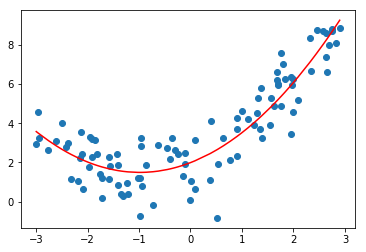

In [11]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color ='r')
plt.show()

# 过拟合和欠拟合

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

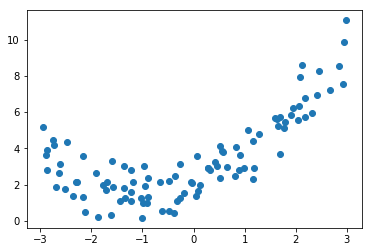

In [16]:
plt.scatter(X, y)
plt.show()

线性回归

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)


0.4770435482408536

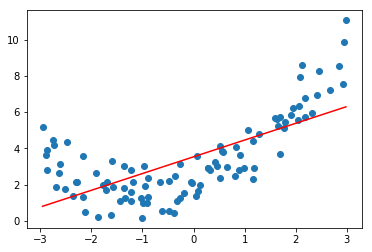

In [20]:
y_predict = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y,y_predict)

2.641216876779077

## 使用多项式回归

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynamialRegression(degree):
    return Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lin_reg', LinearRegression())   
    ])


In [24]:
poly2_reg = PolynamialRegression(degree=2)
poly2_reg.fit(X,y)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [25]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y,y2_predict)

0.8231776851671003

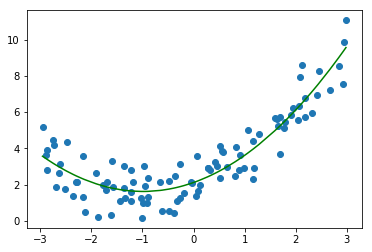

In [27]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color ='g')
plt.show()

In [28]:
poly10_reg = PolynamialRegression(degree=10)
poly10_reg.fit(X,y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y,y10_predict)

0.725525848089555

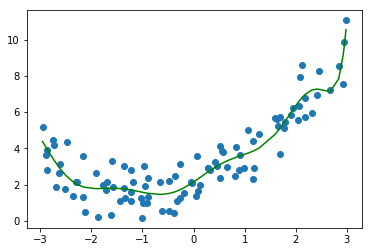

In [29]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color ='g')
plt.show()

In [ ]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color ='g')
plt.show()

In [32]:
poly100_reg = PolynamialRegression(degree=100)
poly100_reg.fit(X,y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y,y100_predict)



0.4136339425339315

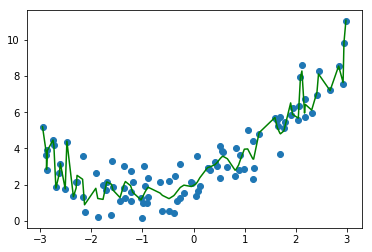

In [31]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color ='g')
plt.show()

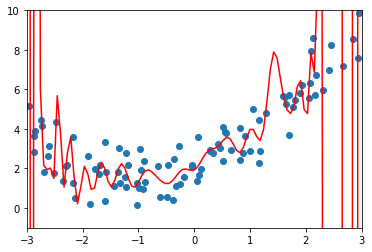

In [36]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color="r")
plt.axis([-3, 3, -1, 10])
plt.show()